# Machine Learning on Boston Housing Dataset

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s




I**mport the required Libraries**

In [195]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

**Load the Boston Housing DataSet from scikit-learn**

In [196]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

**Load the data into pandas dataframe**

In [197]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The target values is missing from the data. Create a new column of target values and add it to dataframe**

In [198]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 1. Data understanding and preprocessing - Check if any of the feature variables have null values - 50 pts

**1.0 Check for missing values** - 10 pts

In [199]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**1.1. Data Visualization** - Plot histogram for median housing prices - 15 pts

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE101A9898>]],
      dtype=object)

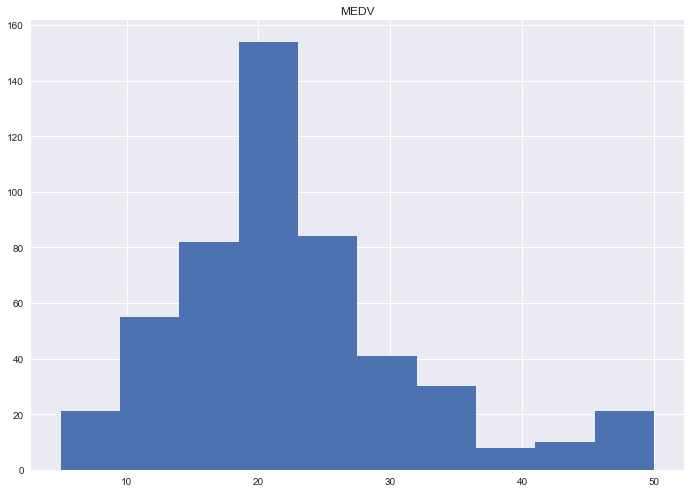

In [200]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
boston.hist(column = "MEDV")

**1.2. Correlation matrix** - Check if there is any corelation between the variables of the features. Present observations - 25 pts

In [201]:
# compute the pair wise correlation for all columns  
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


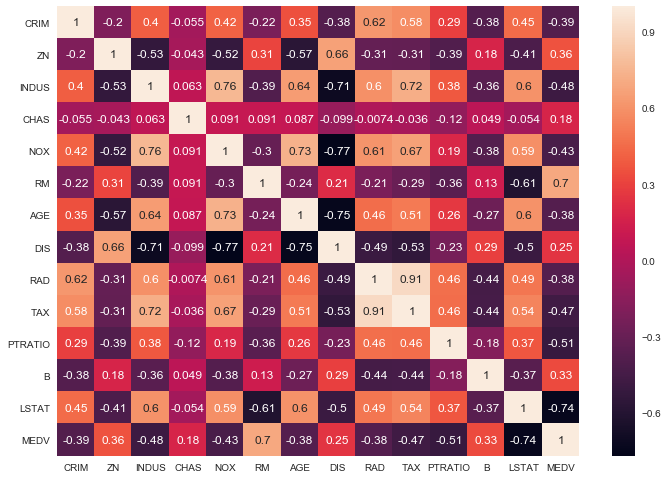

In [202]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square. Use sns.heatmap
sns.heatmap(boston.corr(), annot = True)

**Observations**
- Describe the observations from the heatmap. Talk about relationships between variables





The strongest correlations are around +/- 0.7 for the data set. 0.7 correlation shows a moderate relationship between the variables. A positive correlation means that both variables trend in the same direction. A negative correlation means they trend in opposite directions. There are few strongly correlated relationships in this data set. 

Median value (MEDV) is shown to be strongly correlated to the number of rooms per dwelling (RM) and strongly inverse correlated to the percentage of the lower status of the population (LSTAT). More rooms correlates with higher property value, while more lower status people correlates with lower property value. MEDV has at least a weak correlation to all variables in the dataset. It has the weakest relationship with CHAS. 

DIS has strong inverse correlations with INDUS, NOX, and AGE. More distance to Boston employment centers correlates with less industrial buildings nearby, less nitrous oxide content, and less aged buildings. 

**Confirm Corelations** - Show corelations between median value and 2-3 other variables using a scatter plot

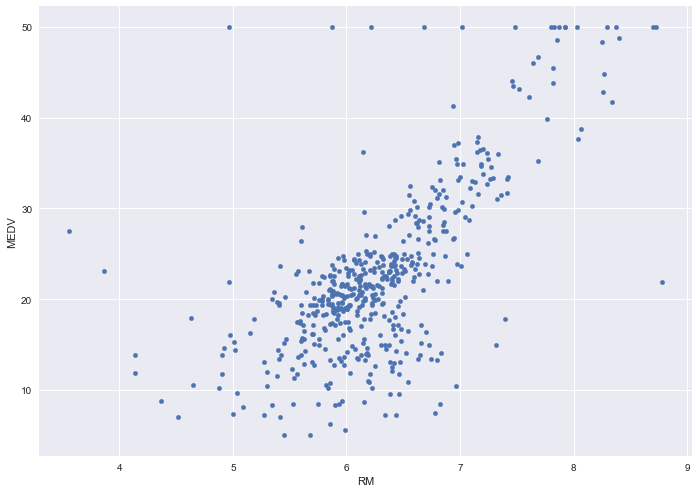

In [203]:
boston.plot.scatter(x='RM', y='MEDV')

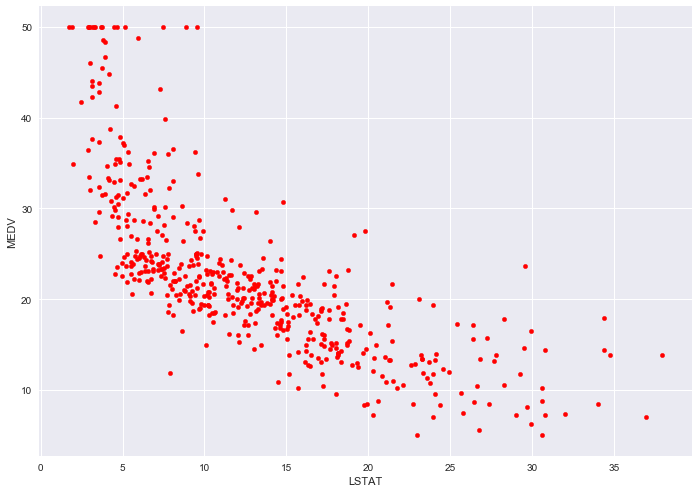

In [204]:
boston.plot.scatter(x='LSTAT', y='MEDV', c='Red')

### 2. Create an Basic Linear Regression model using Sci-Kit (sklearn) - 35 pts

**2.0 Prepare the data for training** - 5 pts

In [205]:
X = boston.RM[:, np.newaxis]
y = boston.MEDV

**2.1 Create Validation Data** - Split the data into training and testing sets - 5pts

In [206]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)


**2.2. Train the model using sklearn LinearRegression** - 5 pts

In [207]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_val = regr.predict(X_train)

**2.3 Evaluate model** - Use R2 and RMSE scores for the training and validation data - 10 pts

In [208]:
# model evaluation for training set
# root mean square error of the model
print("Root mean squared error y_train: %.2f" % sqrt(mean_squared_error(y_train, y_val)))
# r-squared score of the model
print('r-squared score y_train: %.2f' % r2_score(y_train, y_val))

# model evaluation for testing set
# root mean square error of the model
print("Root mean squared error y_test: %.2f" % sqrt(mean_squared_error(y_test, y_pred)))
# r-squared score of the model
print('r-squared score y_test: %.2f' % r2_score(y_test, y_pred))

Root mean squared error y_train: 6.11
r-squared score y_train: 0.48
Root mean squared error y_test: 6.73
r-squared score y_test: 0.48


**2.4 Plot the Linear Regression Model** - 10 pts 

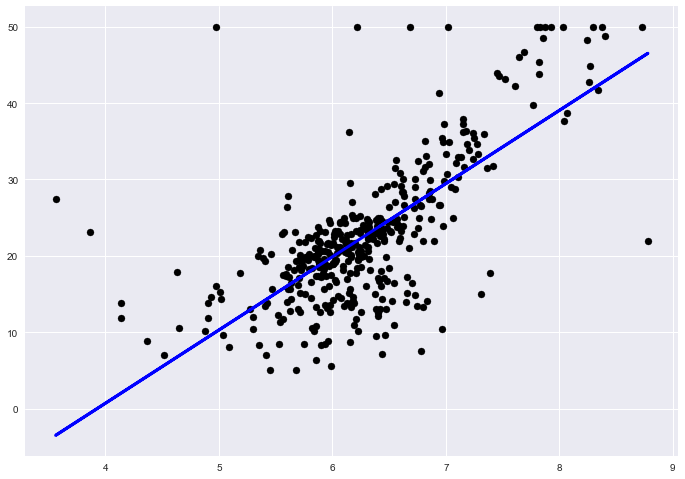

In [209]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

## 3. Effect of Dimensionality - Evaluate the Effect of Dimensionality Reduction - 35 pts

**3.0 Dimensionality  Reduction** - Test number of components 2 - 12 for PCA - 15 pts

In [210]:
# instantiate PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

In [211]:
#create new X and Y
X = boston
y = boston.MEDV

In [212]:
#fit pca
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

4 or less components give us an R-square value of 0.30 or below.

5 or more components give us an R-square value of 0.92 or greater.

Thus, we will use 5 components for this model.

**3.1 Transform original data to the PCA components** - 5 pts

In [213]:
X_trans = pca.fit_transform(X)

Create train test split

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.80, random_state=42)

**3.2 Fit linear regression model and evaluate performance.** - 15 pts

In [215]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_val = regr.predict(X_train)

In [216]:
# model evaluation for training set
# root mean square error of the model
print("Root mean squared error y_train: %.2f" % sqrt(mean_squared_error(y_train, y_val)))
# r-squared score of the model
print('r-squared score y_train: %.2f' % r2_score(y_train, y_val))

# model evaluation for testing set
# root mean square error of the model
print("Root mean squared error y_test: %.2f" % sqrt(mean_squared_error(y_test, y_pred)))
# r-squared score of the model
print('r-squared score y_test: %.2f' % r2_score(y_test, y_pred))


Root mean squared error y_train: 2.11
r-squared score y_train: 0.94
Root mean squared error y_test: 2.62
r-squared score y_test: 0.92


## 4. Evaluate A Different Model - Random Forest Regressor - 30 pts

Conduct the same steps as linear regression model but with Random Forest Regressor. Describe the difference between training and validation error.

In [217]:
X = boston.RM[:, np.newaxis]
y = boston.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [218]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_val = regr.predict(X_train)

**Preform Model Evaluation**

In [219]:
# model evaluation for training set
# root mean square error of the model
print("Root mean squared error y_train: %.2f" % sqrt(mean_squared_error(y_train, y_val)))
# r-squared score of the model
print('r-squared score y_train: %.2f' % r2_score(y_train, y_val))

# model evaluation for testing set
# root mean square error of the model
print("Root mean squared error y_test: %.2f" % sqrt(mean_squared_error(y_test, y_pred)))
# r-squared score of the model
print('r-squared score y_test: %.2f' % r2_score(y_test, y_pred))

Root mean squared error y_train: 3.19
r-squared score y_train: 0.86
Root mean squared error y_test: 6.88
r-squared score y_test: 0.46


Training error is the when the model predicts the value wrong for a data it has already seen. Validation error is when the model predicts the value wrong for data it has never seen. Here, the validation error is higher than the training error, which is to be expected, since it was not trained on the validation data. 